Чтение данных

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('boston_data.csv')
dfTest = pd.read_csv('boston_test_data.csv')
df.head(5)

'''
Переменная medv является целевой переменной.
Описание данных. В таблице данных Бостона 506 строк и 14 столбцов.
В таблице данных содержатся следующие столбцы:

crim – уровень преступности на душу населения по городам.

zn – доля жилых земель, отведенных под участки площадью более 25 000 кв. футов (25 000 кв. футов).

indus – доля неторговых предприятий в акрах на город.

chas – фиктивная переменная реки Чарльз (= 1, если участок граничит с рекой; 0 в противном случае).

nox – концентрация оксидов азота (частей на 10 миллионов).

rm – среднее количество комнат в жилище.

age - возрастная доля жилых помещений, построенных до 1940 года, занимаемых собственниками.

dis – средневзвешенное значение расстояний до пяти бостонских центров занятости.

rad – индекс доступности к радиальным магистралям.

tax – ставка налога на имущество с полной стоимостью за 10 000 долларов США.

ptratio — соотношение числа учеников и учителей по городам.

black - афроамериканцы 1000 (Bk - 0,63)^2, где Bk — доля афроамериканцев по городам.

lstat — более низкий статус населения (в процентах).

medv — медианная стоимость домов, занимаемых владельцами, в тысячах долларов.
'''

'\nПеременная medv является целевой переменной.\nОписание данных. В таблице данных Бостона 506 строк и 14 столбцов.\nВ таблице данных содержатся следующие столбцы:\n\ncrim – уровень преступности на душу населения по городам.\n\nzn – доля жилых земель, отведенных под участки площадью более 25 000 кв. футов (25 000 кв. футов).\n\nindus – доля неторговых предприятий в акрах на город.\n\nchas – фиктивная переменная реки Чарльз (= 1, если участок граничит с рекой; 0 в противном случае).\n\nnox – концентрация оксидов азота (частей на 10 миллионов).\n\nrm – среднее количество комнат в жилище.\n\nage - возрастная доля жилых помещений, построенных до 1940 года, занимаемых собственниками.\n\ndis – средневзвешенное значение расстояний до пяти бостонских центров занятости.\n\nrad – индекс доступности к радиальным магистралям.\n\ntax – ставка налога на имущество с полной стоимостью за 10 000 долларов США.\n\nptratio — соотношение числа учеников и учителей по городам.\n\nblack - афроамериканцы 1000 

Заполнение пропусков

In [82]:
df.ffill()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


Boxplot всех признаков

['chas']
['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']


<Figure size 1200x800 with 0 Axes>

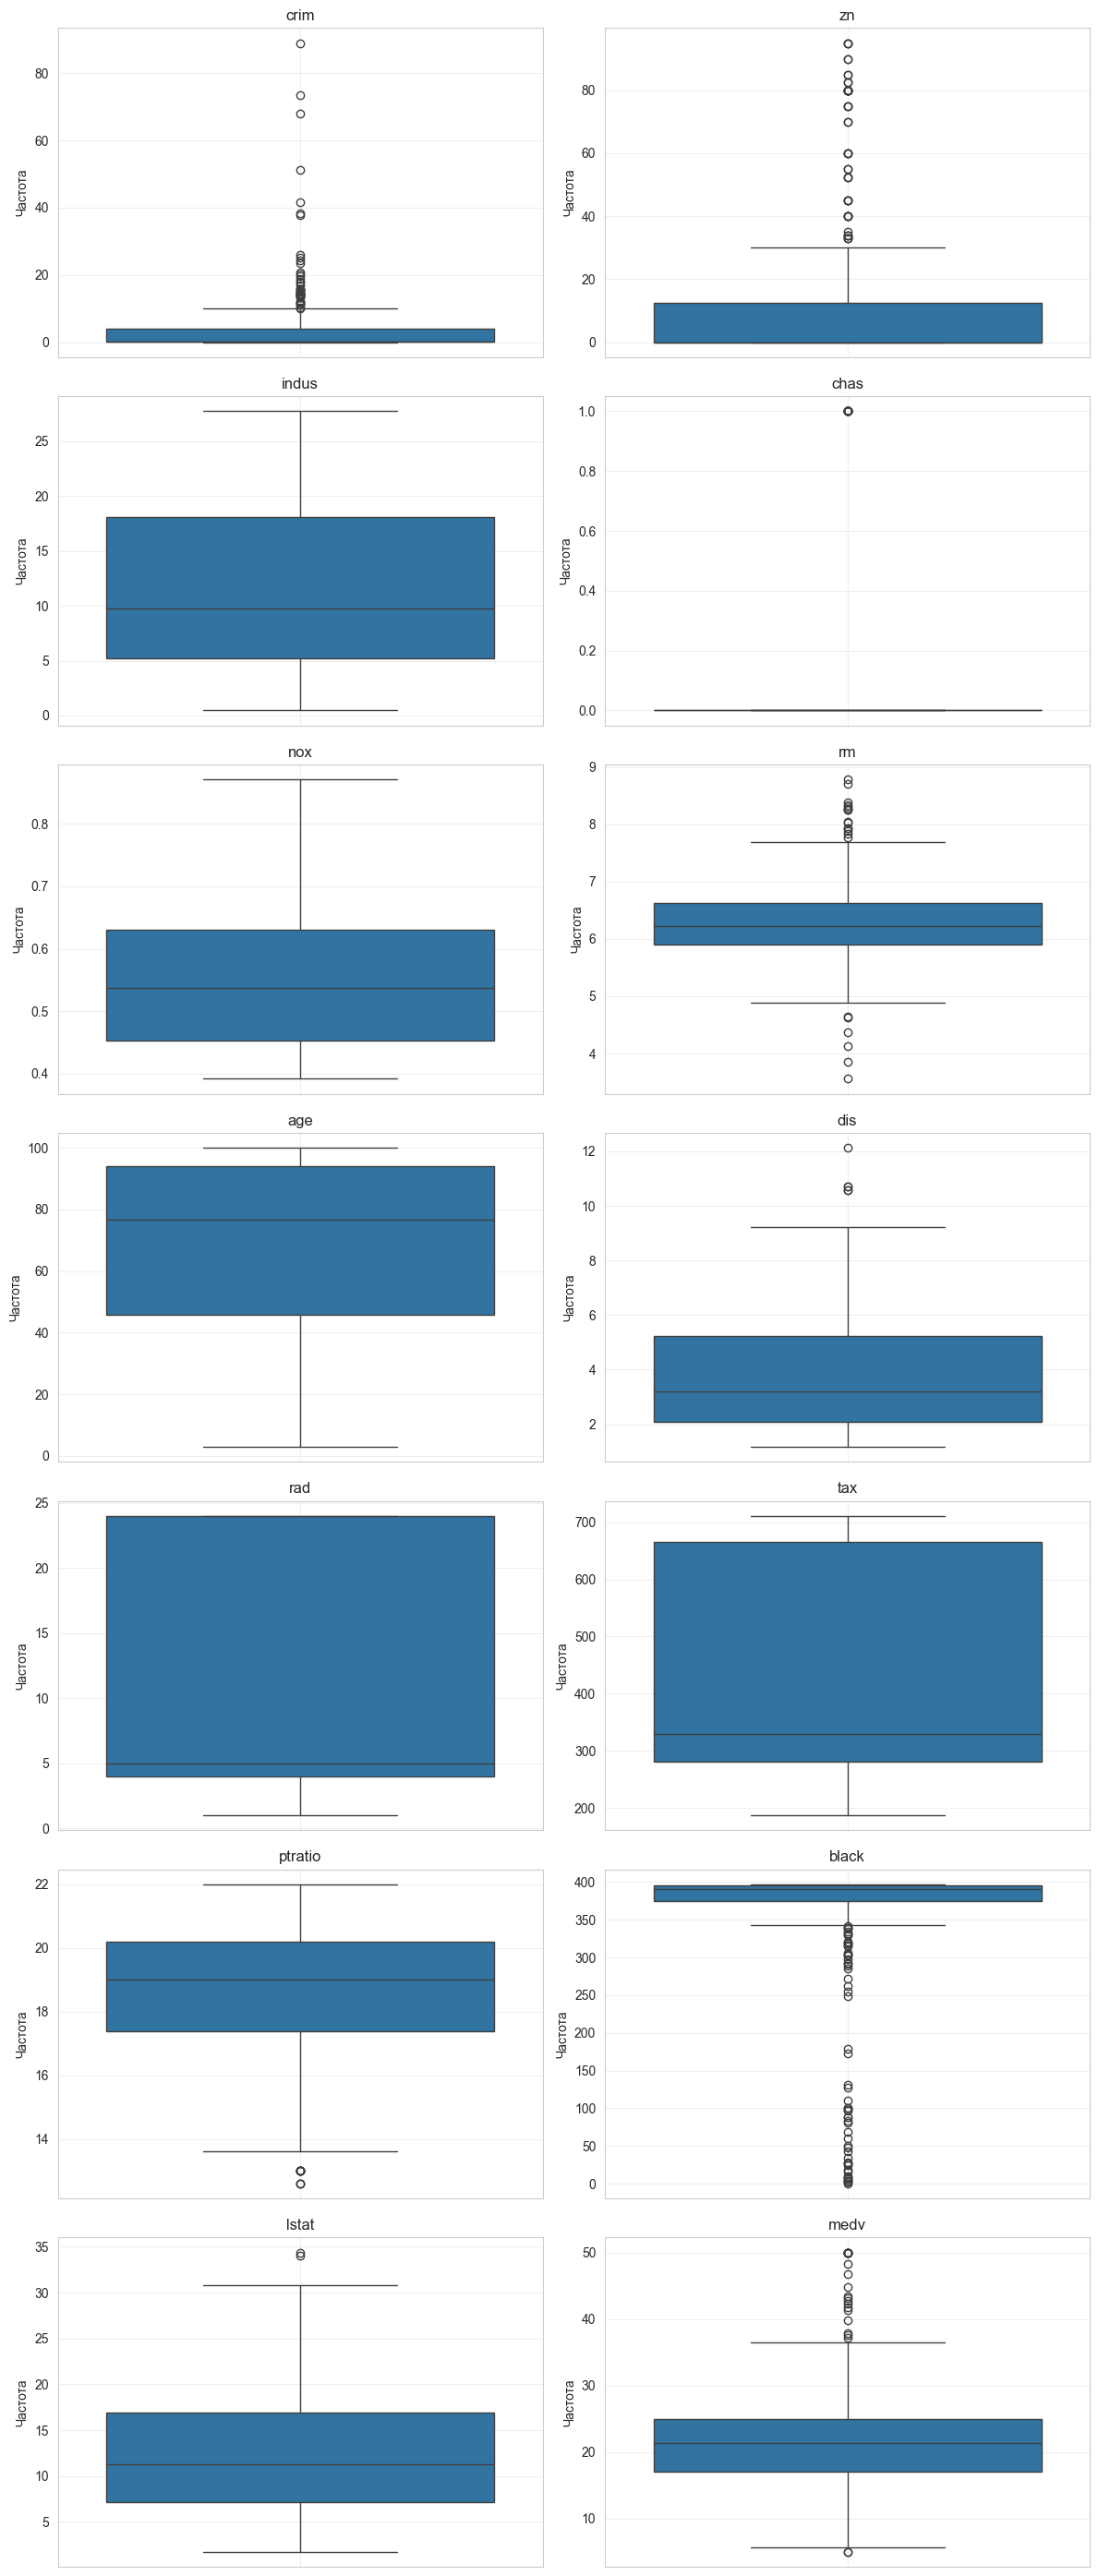

In [83]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

numeric_cols = []
binary_cols = []
for col in df.columns:
    unique_vals = df[col].unique()
    if len(unique_vals) == 2: binary_cols.append(col)
    else: numeric_cols.append(col)

print(binary_cols)
print(numeric_cols)

def showBoxplots():
    n_cols = 2
    n_rows = len(numeric_cols) // n_cols + (1 if len(numeric_cols) % n_cols else 0)

    plt.figure(figsize=(12, 4 * n_rows))

    for i, col in enumerate(df.columns):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(data=df[col])
        plt.xticks(rotation=45)
        plt.title(f'{col}')
        plt.ylabel('Частота')
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
showBoxplots()

Очистка выбросов

Очищено: 158 строк


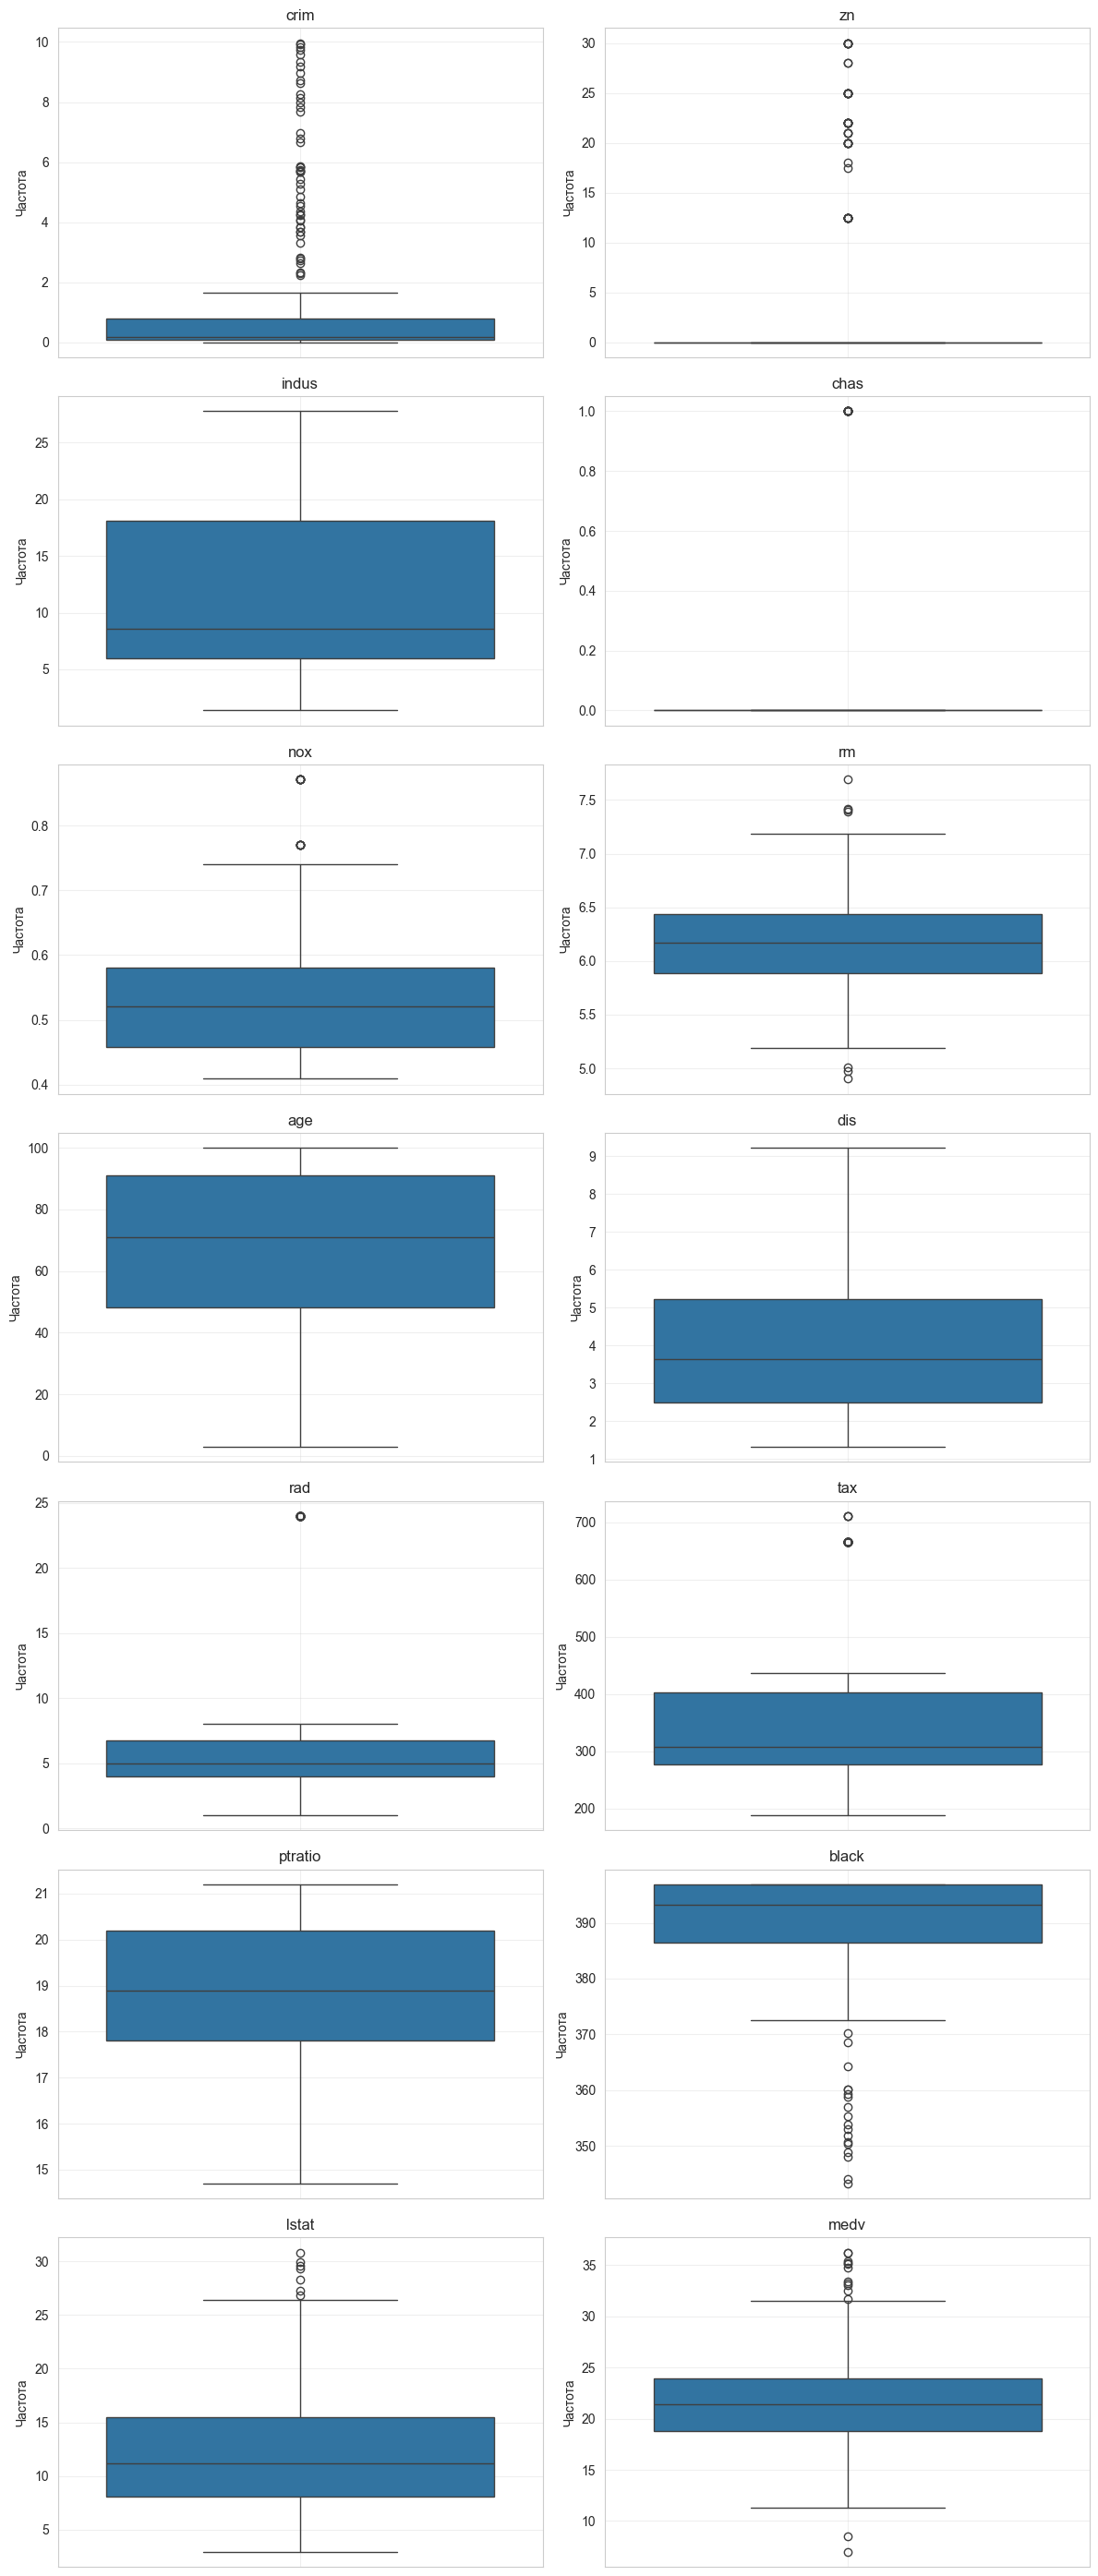

In [84]:
outlier_indices = set()

for col in numeric_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outlier_indices.update(df[(df[col] < lower) | (df[col] > upper)].index)

df_clean = df.drop(index=outlier_indices).reset_index(drop=True)
print(f"Очищено: {len(outlier_indices)} строк")
df = df_clean
showBoxplots()

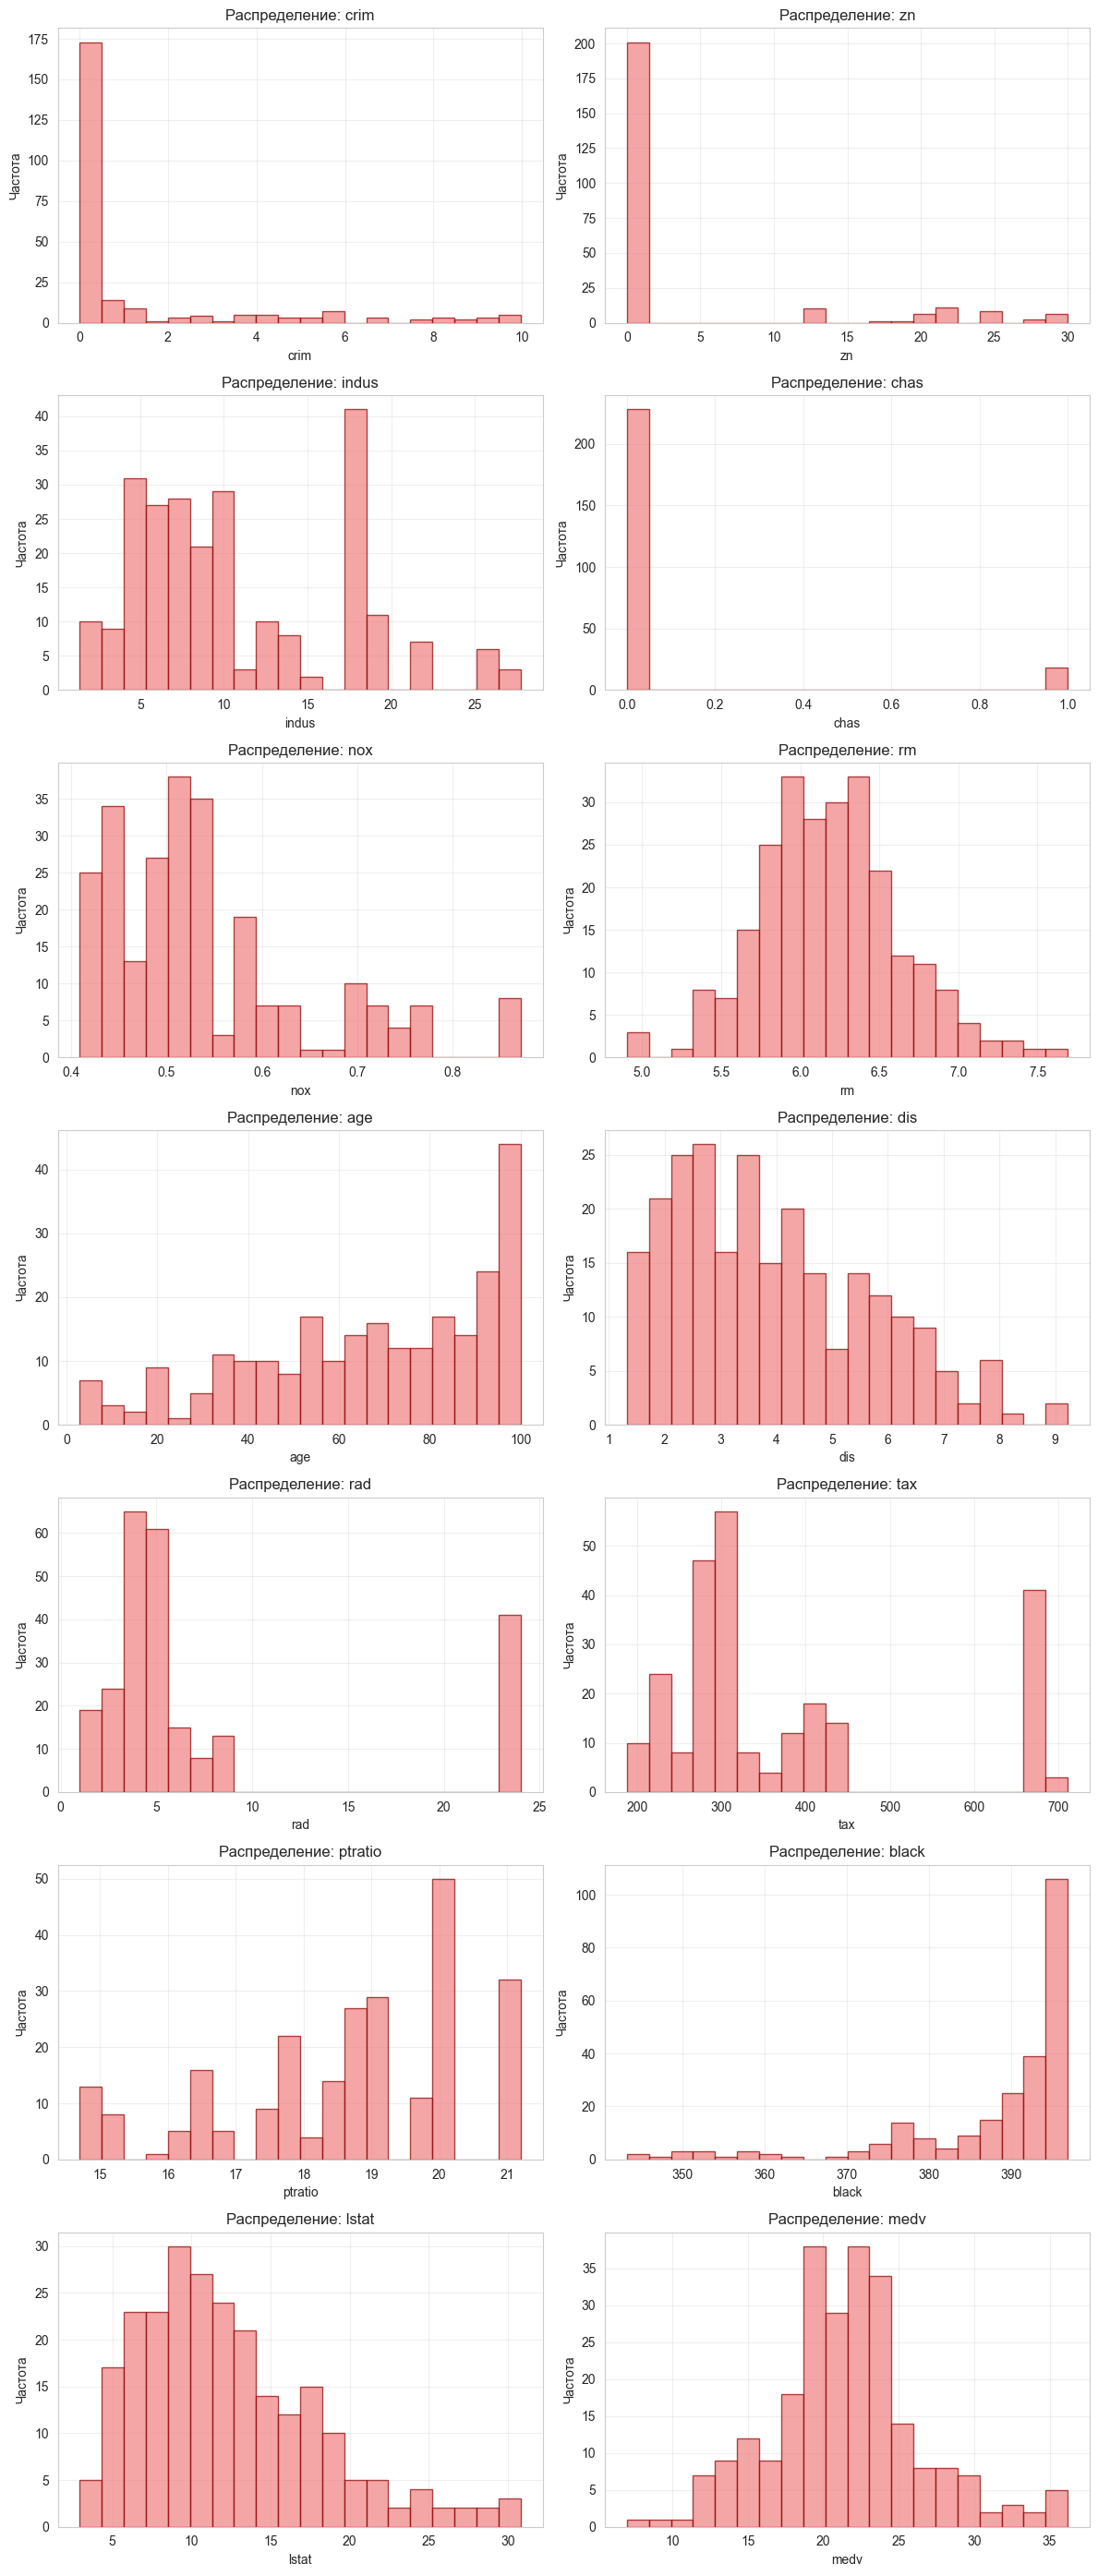

In [85]:
n_cols = 2
n_rows = len(numeric_cols) // n_cols + (1 if len(numeric_cols) % n_cols else 0)

plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(df[col], bins=20, color='lightcoral', edgecolor='darkred', alpha=0.7)
    plt.title(f'Распределение: {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Матрица корреляций

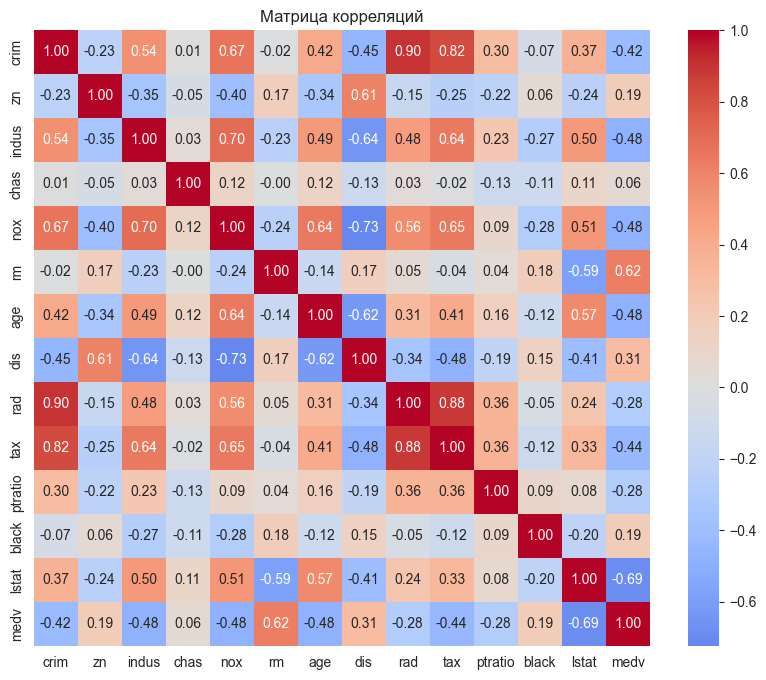

In [86]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
             annot=True,
             cmap='coolwarm',
             center=0,
             square=True,
             fmt='.2f')
plt.title('Матрица корреляций')
plt.show()

Скейлинг

In [87]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop('medv', axis=1)
y = df['medv'] 

scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

X_scaled = scaler_features.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

y_scaled = scaler_target.fit_transform(y.values.reshape(-1, 1))
y = y_scaled.ravel()

Обучение

In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

# Для красивого отображения таблиц в Jupyter Notebook
from IPython.display import display

# Настраиваем кросс-валидацию (например, 5 фолдов)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Создаем scorer для MSE (с отрицательным знаком, т.к. cross_val_score максимизирует метрику)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR(kernel='rbf', C=1.0),
    'K-Neighbors': KNeighborsRegressor(n_neighbors=5)
}

results = pd.DataFrame(columns=['Model', 'Mean MSE', 'Std MSE']).astype({
    'Model': 'object',
    'Mean MSE': 'float64',
    'Std MSE': 'float64'
})

# Проходим по всем моделям
for name, model in models.items():
    print(f"Оцениваем модель: {name}")
    
    # Выполняем кросс-валидацию с вычислением MSE
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)
    
    # Преобразуем обратно (убираем минус)
    cv_scores = -cv_scores
    
    # Добавляем результаты в DataFrame
    results = pd.concat([results, pd.DataFrame({
        'Model': [name],
        'Mean MSE': [cv_scores.mean()],
        'Std MSE': [cv_scores.std()]
    })], ignore_index=True)

# Сортируем модели по Mean MSE (чем меньше, тем лучше)
results = results.sort_values('Mean MSE', ascending=True)
display(results)

Оцениваем модель: Linear Regression
Оцениваем модель: Ridge
Оцениваем модель: Lasso
Оцениваем модель: ElasticNet
Оцениваем модель: Random Forest
Оцениваем модель: Gradient Boosting
Оцениваем модель: Support Vector Machine
Оцениваем модель: K-Neighbors


,Model,Mean MSE,Std MSE
4,Random Forest,0.008499,0.003514
5,Gradient Boosting,0.008511,0.003429
6,Support Vector Machine,0.008557,0.003121
0,Linear Regression,0.008626,0.002115
1,Ridge,0.009281,0.002759
7,K-Neighbors,0.012444,0.004385
3,ElasticNet,0.029480,0.007738
2,Lasso,0.029480,0.007738


Обучение лучшей модели

In [ ]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X, y)
dfTest_scaled = scaler_features.fit_transform(dfTest)
dfTest_scaled = pd.DataFrame(dfTest_scaled, columns=dfTest.columns)
y_pred = rfr.predict(dfTest_scaled)
y_pred_original = scaler_target.inverse_transform(y_pred.reshape(-1, 1)).flatten()

results_df = dfTest.iloc[:10].copy()
results_df['predicted_price'] = y_pred_original[:10]

display_columns = ['rm', 'age', 'tax', 'ptratio', 'lstat', 'predicted_price']

print("Таблица предсказаний:")
display(results_df[display_columns].round(2).style.format({
    'predicted_price': '${:.2f} тыс.',
    'tax': '${:.0f}',
    'rm': '{:.1f}',
    'age': '{:.1f}%',
    'ptratio': '{:.1f}',
    'lstat': '{:.1f}%'
}))


Таблица предсказаний:


,rm,age,tax,ptratio,lstat,predicted_price
0,7.2,27.7%,$245,19.2,3.6%,$28.21 тыс.
1,6.0,45.7%,$243,16.8,13.4%,$20.58 тыс.
2,6.0,82.0%,$307,21.0,27.7%,$19.30 тыс.
3,6.3,28.9%,$287,19.6,6.2%,$24.33 тыс.
4,6.0,85.5%,$233,17.9,18.8%,$20.50 тыс.
5,6.3,20.1%,$358,14.8,5.0%,$24.50 тыс.
6,6.1,85.2%,$384,20.9,14.1%,$20.03 тыс.
7,6.1,91.7%,$307,21.0,18.7%,$19.42 тыс.
8,5.3,100.0%,$277,18.6,23.1%,$17.81 тыс.
9,7.8,36.9%,$276,18.0,3.6%,$30.81 тыс.
